<a href="https://colab.research.google.com/github/taniahdez75/st/blob/main/Final%20Datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import basic libraries
import numpy as np 
import pandas as pd 


In [3]:
df = pd.read_excel('/content/sample_data/final.xlsx')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# Chek for duplicates
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [7]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

In [9]:
numerics=['int64','float64']
catDF= df.select_dtypes(exclude=numerics)
numDF= df.select_dtypes(include=numerics)

In [10]:
catDF.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [11]:
#Scale all numeric column
#numeric_cols = df.select_dtypes(include=['int', 'float']).columns
numDF = pd.DataFrame(scaler.fit_transform(numDF.values),columns=numDF.columns,index=numDF.index)
#scaled_df = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols, index=df.index)
numDF.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,-0.754885,0.611111,0.0,1.0,3.712987,0.885417,1.0
1,0.399126,0.444444,0.0,0.0,2.994300,NaN,1.0
2,-0.157550,0.972222,0.0,1.0,0.380920,0.458333,1.0
3,0.629386,0.111111,0.0,0.0,2.153481,0.656250,1.0
4,-0.954691,0.944444,1.0,0.0,2.231917,-0.427083,1.0


NameError: ignored

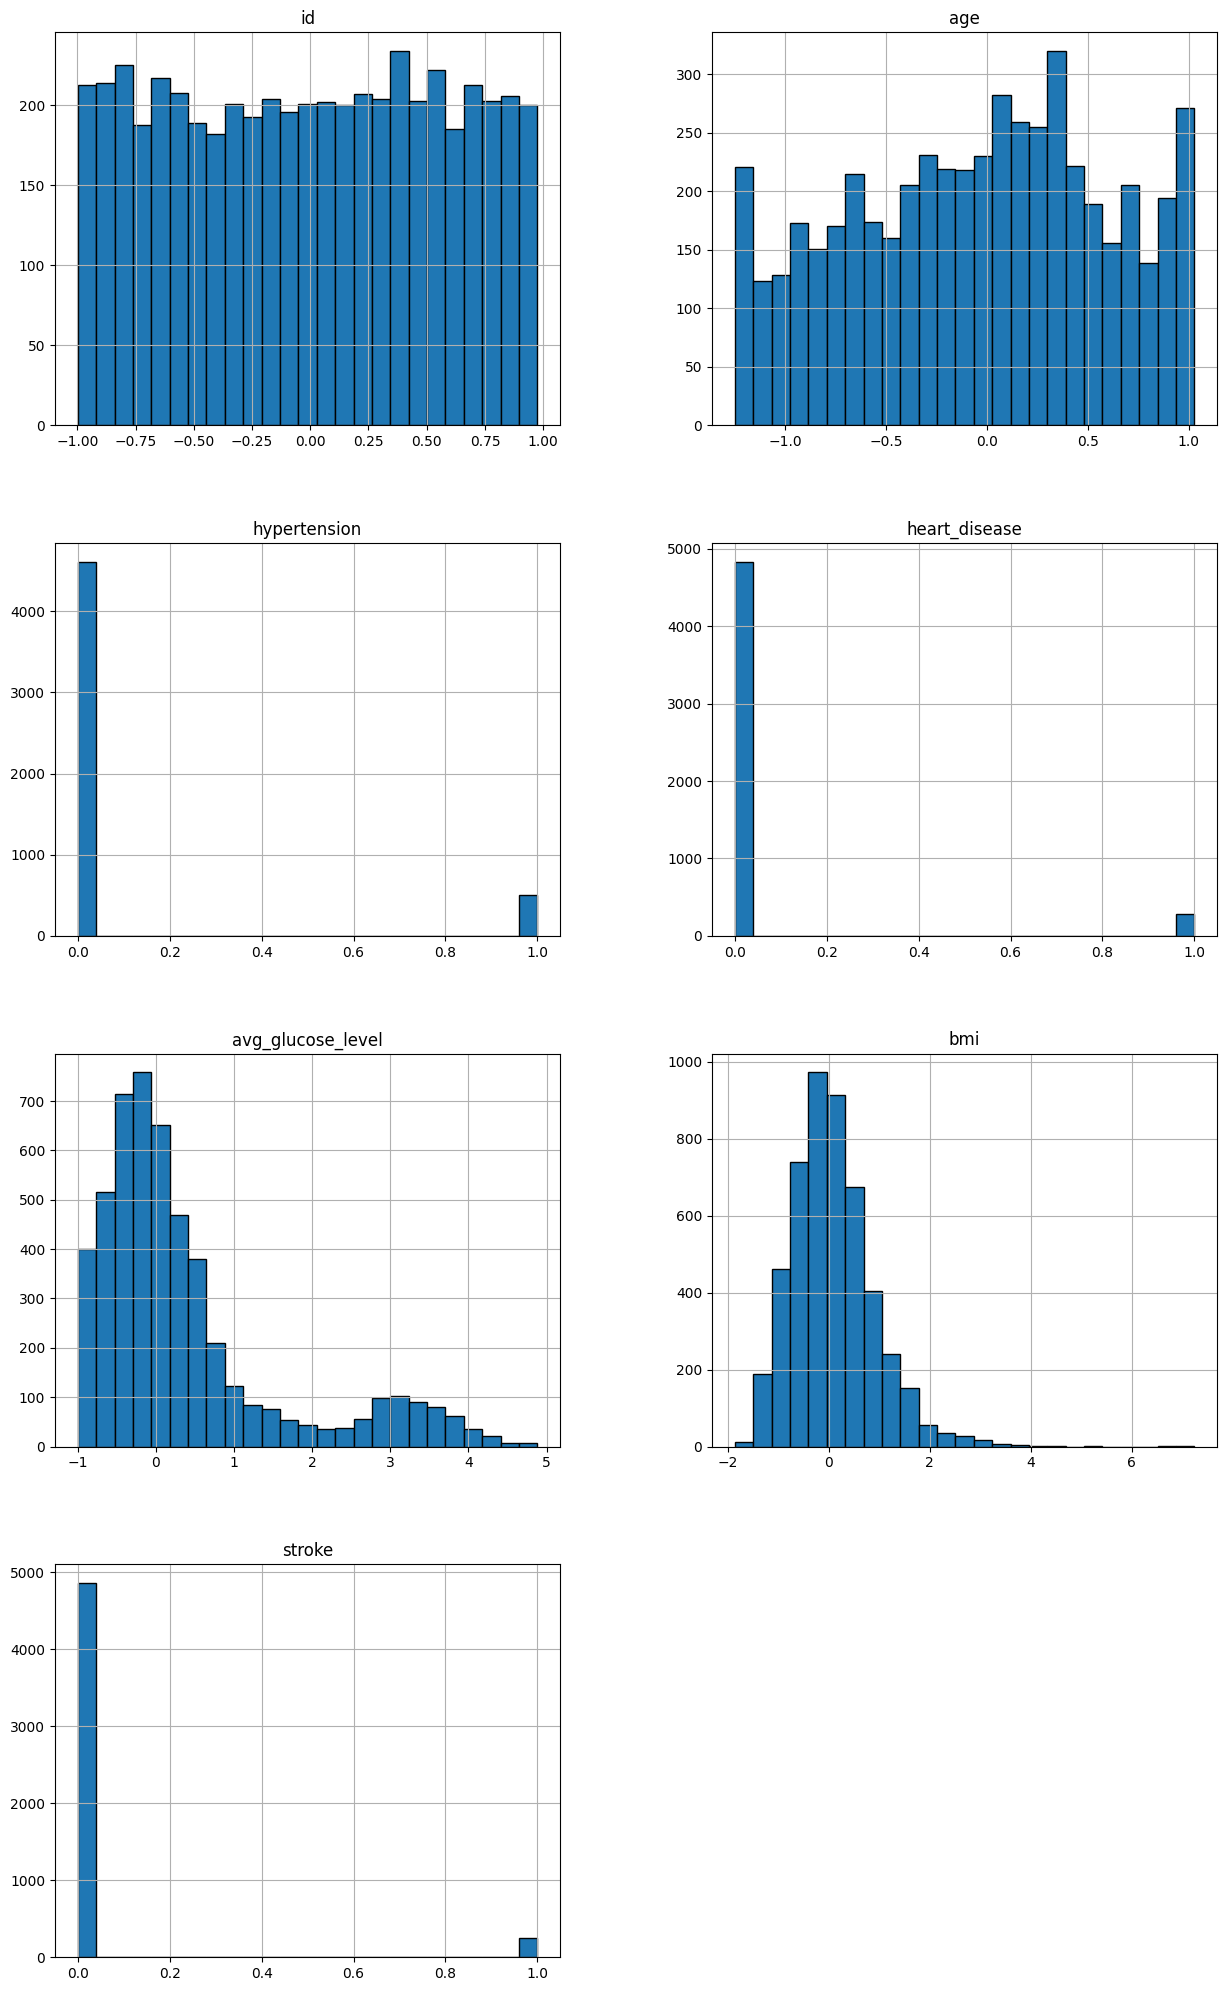

In [12]:
#Feature Distribution
numDF.hist(bins=25, figsize=(15, 25), layout=(-1, 2), edgecolor="black")
plt.tight_layout()
plt.show()

In [13]:
catDF.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [15]:
catDF=pd.get_dummies(catDF)
catDF.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0


In [16]:
numDF.drop(['stroke'],axis=1,inplace=True)

In [21]:
numDF.drop(['bmi'],axis=1,inplace=True)

In [22]:
numDF.head()

,id,age,hypertension,heart_disease,avg_glucose_level
0,-0.754885,0.611111,0.0,1.0,3.712987
1,0.399126,0.444444,0.0,0.0,2.994300
2,-0.157550,0.972222,0.0,1.0,0.380920
3,0.629386,0.111111,0.0,0.0,2.153481
4,-0.954691,0.944444,1.0,0.0,2.231917


In [23]:
X=pd.concat([catDF,numDF], axis=1)
print(X.shape)
#Prepare Y
Y=df['stroke']

(5110, 21)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=100,stratify=Y)


In [25]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=5, random_state=43, n_estimators=300).fit(X_train, y_train)
rf.feature_importances_
feature_importances=pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})

#sort
feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

                           feature  importance
17                             age    0.325064
20               avg_glucose_level    0.200690
16                              id    0.124488
18                    hypertension    0.064994
19                   heart_disease    0.063581
3                  ever_married_No    0.027165
4                 ever_married_Yes    0.026014
8          work_type_Self-employed    0.019430
11            Residence_type_Urban    0.017532
7                work_type_Private    0.016536
10            Residence_type_Rural    0.016478
0                    gender_Female    0.014841
1                      gender_Male    0.014709
14     smoking_status_never smoked    0.013784
5               work_type_Govt_job    0.012738
15           smoking_status_smokes    0.012238
13  smoking_status_formerly smoked    0.011903
12          smoking_status_Unknown    0.010172
9               work_type_children    0.007624
6           work_type_Never_worked    0.000019
2            

In [31]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [28]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3577, 21) (1533, 21) (3577,) (1533,)


In [29]:
# determine the number of input features
n_features = X_train.shape[1]

In [32]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

In [33]:
# compile the model\n",
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
 # fit the model\n",
 model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

In [35]:
  # evaluate the model\n",
  loss, acc = model.evaluate(X_test, y_test, verbose=0)

In [36]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.949


In [38]:
X_test.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,id,age,hypertension,heart_disease,avg_glucose_level
2119,0,1,0,0,1,0,0,1,0,0,...,1,0,1,0,0,-0.297828,-0.083333,0.0,0.0,-0.641742
482,1,0,0,0,1,0,0,0,1,0,...,1,1,0,0,0,-0.123739,0.916667,0.0,1.0,-0.503868
464,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,-0.767093,-0.555556,0.0,0.0,0.100556
4900,0,1,0,1,0,0,0,0,0,1,...,1,1,0,0,0,-0.077096,-1.055556,0.0,0.0,-0.400733
1321,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0.371351,-0.416667,0.0,0.0,-0.253087


In [41]:
# make a prediction\n",
row = X_test.iloc[[0]]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

1/1 [==============================] - 0s 159ms/step
Predicted: 0.002


In [ ]:

       
      
        "print('Test Accuracy: %.3f' % acc)\n",
        